Start with exploratory sweep

In [1]:
#import
from ema_workbench import Model, MultiprocessingEvaluator, Policy, Scenario

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import pairs_plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

from ema_workbench.analysis import feature_scoring

In [2]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=3)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
  0%|                                                  | 0/300 [00:00<?, ?it/s]DEBUG | calling run_experiment on ExperimentRunner
DEBUG | running scenario 3 for policy 0 on model dikesnet
DEBUG | calling run_model on SingleReplication
DEBUG | calling run_model on AbstractModel
DEBUG | calling initialized on AbstractModel
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | completed calling initialized on AbstractModel
DEBUG | calling model_init on AbstractModel
DEBUG | completed calling model_init on AbstractModel
DEBUG | calling _transform on AbstractModel
DEBUG | running scenario 4 for policy 0 on model dikesnet
DEBUG | calling run_model on SingleReplication
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | calling run_model on AbstractModel
DEBUG | calling initialized on AbstractModel
DEBUG | completed calling initialized on AbstractModel
DEBUG | calling mod

DEBUG HRI append A.1 0 0.99
DEBUG HRI append A.2 0 1.04
DEBUG HRI append A.3 0 0.9600000000000001
DEBUG HRI append A.4 0 1.05
DEBUG HRI append A.5 0 0.98
DEBUG HRI append A.1 1 1.04
DEBUG HRI append A.2 1 0.98
DEBUG HRI append A.3 1 1.05
DEBUG HRI append A.4 1 1.05
DEBUG HRI append A.5 1 0.9600000000000001
DEBUG HRI append A.1 2 0.9500000000000001
DEBUG HRI append A.2 2 1.05
DEBUG HRI append A.3 2 1.0
DEBUG HRI append A.4 2 1.04
DEBUG HRI append A.5 2 1.04
DEBUG HRI append A.1 0 0.99
DEBUG HRI append A.2 0 1.04
DEBUG HRI append A.3 0 0.9600000000000001
DEBUG HRI append A.4 0 1.05
DEBUG HRI append A.5 0 0.98
DEBUG HRI append A.1 1 1.04
DEBUG HRI append A.2 1 0.98
DEBUG HRI append A.3 1 1.05
DEBUG HRI append A.4 1 1.05
DEBUG HRI append A.5 1 0.9600000000000001
DEBUG HRI append A.1 2 0.9500000000000001
DEBUG HRI append A.2 2 1.05
DEBUG HRI append A.3 2 1.0
DEBUG HRI append A.4 2 1.04
DEBUG HRI append A.5 2 1.04
DEBUG HRI append A.1 0 0.99
DEBUG HRI append A.2 0 1.04
DEBUG HRI append A.3 0

In [3]:
def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}

policies = [Policy("baseline", **get_do_nothing_dict())]


In [4]:
 with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=policies)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
  0%|                                                  | 0/100 [00:00<?, ?it/s]DEBUG | calling run_experiment on ExperimentRunner
DEBUG | running scenario 103 for policy baseline on model dikesnet
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | calling run_model on SingleReplication
DEBUG | calling run_model on AbstractModel
DEBUG | calling initialized on AbstractModel
DEBUG | completed calling initialized on AbstractModel
DEBUG | calling model_init on AbstractModel
DEBUG | completed calling model_init on AbstractModel
DEBUG | calling _transform on AbstractModel
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | running scenario 106 for policy baseline on model dikesnet
DEBUG | calling run_experiment on ExperimentRunner
DEBUG | calling run_model on SingleRep

DEBUG HRI append A.1 0 -1.0
DEBUG HRI append A.2 0 0.0
DEBUG HRI append A.3 0 0.0
DEBUG HRI append A.4 0 0.0
DEBUG HRI append A.5 0 0.0
DEBUG HRI append A.1 1 -1.0
DEBUG HRI append A.2 1 0.0
DEBUG HRI append A.3 1 0.0
DEBUG HRI append A.4 1 0.0
DEBUG HRI append A.5 1 0.0
DEBUG HRI append A.1 2 -1.0
DEBUG HRI append A.2 2 0.0
DEBUG HRI append A.3 2 0.0
DEBUG HRI append A.4 2 0.0
DEBUG HRI append A.5 2 0.0
DEBUG HRI append A.1 0 -1.0
DEBUG HRI append A.2 0 0.0
DEBUG HRI append A.3 0 -1.0
DEBUG HRI append A.4 0 -1.0
DEBUG HRI append A.5 0 0.0
DEBUG HRI append A.1 1 -1.0
DEBUG HRI append A.2 1 0.0
DEBUG HRI append A.3 1 -1.0
DEBUG HRI append A.4 1 -1.0
DEBUG HRI append A.5 1 0.0
DEBUG HRI append A.1 2 -1.0
DEBUG HRI append A.2 2 0.0
DEBUG HRI append A.3 2 -1.0
DEBUG HRI append A.4 2 -1.0
DEBUG HRI append A.5 2 0.0
DEBUG HRI append A.1 0 0.0
DEBUG HRI append A.2 0 -1.0
DEBUG HRI append A.3 0 0.0
DEBUG HRI append A.4 0 -1.0
DEBUG HRI append A.5 0 0.0
DEBUG HRI append A.1 1 0.0
DEBUG HRI appe

In [5]:
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Hydrological Resilience Index', 'Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,23,287.813502,10.0,0.236584,348.594204,1.5,0.704897,241.932477,1.0,0.524190,...,0,0,0,0,0,0,0,103,baseline,dikesnet
1,118,87.156000,10.0,0.862878,318.222089,10.0,0.375819,263.667357,10.0,0.809899,...,0,0,0,0,0,0,0,104,baseline,dikesnet
2,7,263.721909,1.5,0.048488,159.501190,1.0,0.818102,157.033642,10.0,0.255150,...,0,0,0,0,0,0,0,105,baseline,dikesnet
3,72,119.892061,1.0,0.488636,326.734933,10.0,0.331909,68.443135,1.5,0.186044,...,0,0,0,0,0,0,0,106,baseline,dikesnet
4,97,62.638208,10.0,0.911416,211.017843,10.0,0.426362,125.201955,10.0,0.353785,...,0,0,0,0,0,0,0,107,baseline,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,39.844353,10.0,0.995552,140.967531,1.5,0.119281,248.375243,1.0,0.836980,...,0,0,0,0,0,0,0,198,baseline,dikesnet
96,46,294.984484,10.0,0.322731,31.649300,10.0,0.129544,333.727233,10.0,0.743649,...,0,0,0,0,0,0,0,199,baseline,dikesnet
97,78,82.843238,1.0,0.158326,253.417781,1.0,0.509019,262.876825,1.0,0.908795,...,0,0,0,0,0,0,0,200,baseline,dikesnet
98,131,242.653260,1.5,0.502947,333.833259,1.0,0.311256,234.013161,10.0,0.089209,...,0,0,0,0,0,0,0,201,baseline,dikesnet


In [6]:
# 1. y  →  define the target behaviour
y = outcomes["Expected Annual Damage"][:,1] > 1e7       #  True = ‘bad’

# 2. X  →  pick only uncertainty columns
uncertainty_names = [u.name for u in model.uncertainties]
X = pd.DataFrame(experiments)[uncertainty_names]

# 3. PRIM
from ema_workbench.analysis import prim
prim_alg = prim.Prim(X, y, threshold=0.8)
box = prim_alg.find_box()
box.inspect()
box.show_tradeoff()

AssertionError: 

INFO | column policy dropped from analysis because it has only one category
INFO | column model dropped from analysis because it has only one category
INFO | 100 points remaining, containing 20 cases of interest
DEBUG | peeling completed
DEBUG | pasting A.1_Bmax
DEBUG | pasting A.1_pfail
DEBUG | pasting A.2_pfail
DEBUG | pasting A.3_pfail
DEBUG | pasting A.5_pfail
DEBUG | pasting discount rate 1
DEBUG | pasting discount rate 2
DEBUG | pasting completed
INFO | mean: 1.0, mass: 0.1, coverage: 0.5, density: 1.0 restricted_dimensions: 7
DEBUG | Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG | Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG | findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG | findfont: score(FontEntry(fname='/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu San

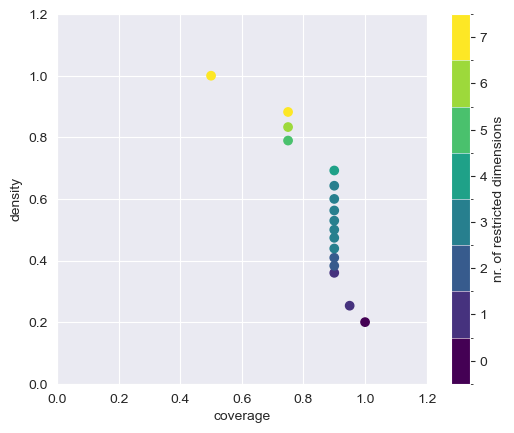

coverage     0.5
density      1.0
id          16.0
k           10.0
mass         0.1
mean         1.0
n           10.0
res_dim      7.0
Name: 16, dtype: float64

                          box 16                                     
                             min              max  qp value  qp value
A.3_pfail               0.004921         0.912364       NaN  1.000000
discount rate 1            {1.5}            {1.5}  0.000512       NaN
A.2_pfail               0.041255         0.998672  0.385543       NaN
discount rate 2  {1.5, 2.5, 4.5}  {1.5, 2.5, 4.5}  0.418904       NaN
A.5_pfail               0.048074         0.996922  1.000000       NaN
A.1_pfail               0.084816         0.639071  1.000000  0.034572
A.1_Bmax               56.000353       326.703625  1.000000  1.000000



/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

In [7]:
#PRIM SCENARIO 1: hoge schade in tijdstap 0
damage = outcomes["Expected Annual Damage"][:,1]

threshold = pd.Series(damage).quantile(0.8)
y_high_damage = damage > threshold

# Run PRIM
prim_alg_high = prim.Prim(experiments, y_high_damage, threshold=0.75)
box_high = prim_alg_high.find_box()

#Plot
box_high.show_tradeoff()
plt.show()

box_high.inspect()

#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen


DEBUG | findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG | findfont: score(FontEntry(fname='/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG | findfont: score(FontEntry(fname='/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG | findfont: score(FontEntry(fname='/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG | findfont: score(FontEntry(fname=

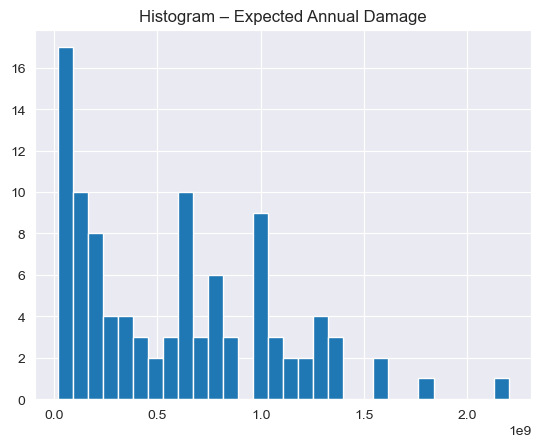

In [8]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
damage = outcomes["Expected Annual Damage"]    # 1-D (PF0–2) or 2-D (PF4)
data = damage if damage.ndim == 1 else damage[:, 1]   # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Expected Annual Damage"); plt.show()


In [11]:
#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen

import numpy as np, pandas as pd, matplotlib.pyplot as plt

HRI = outcomes["Hydrological Resilience Index"]  # 1-D (PF0–2) or 2-D (PF4)
data = HRI if HRI.ndim == 1 else HRI[0]  # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index");
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (6, 3) instead

In [10]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'Hydrological Resilience Index', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [11]:
HRI = outcomes["Hydrological Resilience Index"]   # vector or matrix

# if ndim==1  → just HRI
# else (ndim==2) → use HRI[:, 0]
data = HRI if HRI.ndim == 1 else HRI[:, 0]

pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index")
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

In [16]:
model, _ = get_model_for_problem_formulation(4)
exp, out = perform_experiments(
    model,
    scenarios=1,
    policies=[Policy("baseline", **get_do_nothing_dict())]  # minimal run
)


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]

DEBUG HRI append A.1 0 -1.0
DEBUG HRI append A.1 1 -1.0
DEBUG HRI append A.1 2 -1.0
DEBUG HRI append A.2 0 -1.0
DEBUG HRI append A.2 1 -1.0
DEBUG HRI append A.2 2 -1.0
DEBUG HRI append A.3 0 0.0
DEBUG HRI append A.3 1 0.0
DEBUG HRI append A.3 2 0.0
DEBUG HRI append A.4 0 -1.0
DEBUG HRI append A.4 1 -1.0
DEBUG HRI append A.4 2 -1.0
DEBUG HRI append A.5 0 0.0
DEBUG HRI append A.5 1 0.0
DEBUG HRI append A.5 2 0.0


In [17]:
print("HRI key in outcomes:", [k for k in out.keys() if "Hydrological" in k])
print("Shape =", out["Hydrological Resilience Index"].shape)

HRI key in outcomes: ['Hydrological Resilience Index']
Shape = (1, 0)


In [19]:
print("HRI key in outcomes:", [k for k in out.keys() if "Damage" in k])
print("Shape =", out["Expected Annual Damage"].shape)

HRI key in outcomes: ['Expected Annual Damage']
Shape = (1, 3)


In [15]:
print([k for k in out if "Damage" in k])


['Expected Annual Damage']
